In [1]:
#import libraries
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#set the path to the data
data = "C:/Users/annro/OneDrive/Desktop/UPS/Hackathon_Data.csv"

In [3]:
#read the data with all default parameters
df = pd.read_csv(data)

In [4]:
#get the type
type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38879 entries, 0 to 38878
Data columns (total 11 columns):
SN_EVT_DT                  38879 non-null object
PKG_SN_TCK_NR              38879 non-null object
REG_NR                     38879 non-null int64
DIS_NR                     38879 non-null int64
PKG_SN_DMN_LEN_QY (IN)     38879 non-null float64
PKG_SN_DMN_WID_QY (IN)     38879 non-null float64
PKG_SN_DMN_HT_QY (IN)      38879 non-null float64
PKG_SN_ACT_WGT_QY (LBS)    38879 non-null float64
Type of shipping           38879 non-null object
Holiday or Working Day     38879 non-null object
Next Location              38879 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 3.3+ MB


In [6]:
#use .head() to get top 5 rows
df.head()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Type of shipping,Holiday or Working Day,Next Location
0,6/1/2018,M2401801474,8,99,25.0,14.8,8.4,19.1,3 day,W,F
1,6/1/2018,1ZW698830442440749,8,99,16.6,13.4,13.4,6.7,3 day,W,B
2,6/1/2018,1Z0064A26665793740,8,99,22.8,15.4,8.4,21.9,1-5 day,W,A
3,6/1/2018,1Z02935A0400084148,8,99,17.8,7.2,6.0,5.6,2 day,W,E
4,6/1/2018,1Z4R591VDA17050488,8,99,16.2,15.2,12.4,25.3,same day,W,C


In [7]:
#use tail() to get bottom 5 rows
df.tail()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Type of shipping,Holiday or Working Day,Next Location
38874,6/30/2018,1Z2X039A0475687416,8,99,27.6,16.2,16.6,31.3,2 day,W,F
38875,6/30/2018,1Z46435A0444658672,8,99,13.4,13.0,10.4,20.4,same day,W,B
38876,6/30/2018,1ZV9726V0461493747,8,99,8.8,9.2,7.8,1.7,1 day,W,D
38877,6/30/2018,1ZV489540496119778,8,99,24.6,17.2,13.8,24.5,1 day,W,C
38878,6/30/2018,1Z2A0W030455397161,8,99,11.8,11.8,10.4,15.4,2 day,W,B


### finding dimensional weight for each packages

In [8]:
df['Dimensional Weight (LBS)'] = (df['PKG_SN_DMN_LEN_QY (IN)']*df['PKG_SN_DMN_WID_QY (IN)'] *df['PKG_SN_DMN_HT_QY (IN)'])/166

In [9]:
df.head()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Type of shipping,Holiday or Working Day,Next Location,Dimensional Weight (LBS)
0,6/1/2018,M2401801474,8,99,25.0,14.8,8.4,19.1,3 day,W,F,18.722892
1,6/1/2018,1ZW698830442440749,8,99,16.6,13.4,13.4,6.7,3 day,W,B,17.956000
2,6/1/2018,1Z0064A26665793740,8,99,22.8,15.4,8.4,21.9,1-5 day,W,A,17.767518
3,6/1/2018,1Z02935A0400084148,8,99,17.8,7.2,6.0,5.6,2 day,W,E,4.632289
4,6/1/2018,1Z4R591VDA17050488,8,99,16.2,15.2,12.4,25.3,same day,W,C,18.393831


In [10]:
#billable weight
df['Weight (LBS)'] = df[['PKG_SN_ACT_WGT_QY (LBS)','Dimensional Weight (LBS)']].max(axis=1)

In [11]:
df.head()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Type of shipping,Holiday or Working Day,Next Location,Dimensional Weight (LBS),Weight (LBS)
0,6/1/2018,M2401801474,8,99,25.0,14.8,8.4,19.1,3 day,W,F,18.722892,19.100
1,6/1/2018,1ZW698830442440749,8,99,16.6,13.4,13.4,6.7,3 day,W,B,17.956000,17.956
2,6/1/2018,1Z0064A26665793740,8,99,22.8,15.4,8.4,21.9,1-5 day,W,A,17.767518,21.900
3,6/1/2018,1Z02935A0400084148,8,99,17.8,7.2,6.0,5.6,2 day,W,E,4.632289,5.600
4,6/1/2018,1Z4R591VDA17050488,8,99,16.2,15.2,12.4,25.3,same day,W,C,18.393831,25.300


## Analyzing one day data

In [12]:
df1 = df.loc[df['SN_EVT_DT'] == '6/1/2018',:]

In [14]:
df1.head()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Type of shipping,Holiday or Working Day,Next Location,Dimensional Weight (LBS),Weight (LBS)
0,6/1/2018,M2401801474,8,99,25.0,14.8,8.4,19.1,3 day,W,F,18.722892,19.100
1,6/1/2018,1ZW698830442440749,8,99,16.6,13.4,13.4,6.7,3 day,W,B,17.956000,17.956
2,6/1/2018,1Z0064A26665793740,8,99,22.8,15.4,8.4,21.9,1-5 day,W,A,17.767518,21.900
3,6/1/2018,1Z02935A0400084148,8,99,17.8,7.2,6.0,5.6,2 day,W,E,4.632289,5.600
4,6/1/2018,1Z4R591VDA17050488,8,99,16.2,15.2,12.4,25.3,same day,W,C,18.393831,25.300


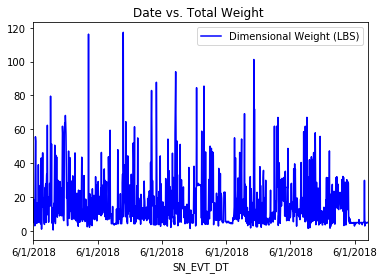

In [15]:
df1.plot(x='SN_EVT_DT', y='Dimensional Weight (LBS)', color='b', title='Date vs. Total Weight ', kind='line')

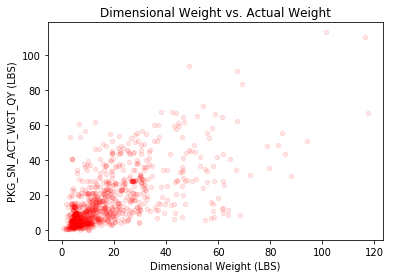

In [16]:
#visualization of dimensional weight and acutal weight
df1.plot(x='Dimensional Weight (LBS)', y='PKG_SN_ACT_WGT_QY (LBS)', color='r', title='Dimensional Weight vs. Actual Weight', kind='scatter', alpha = 0.1)

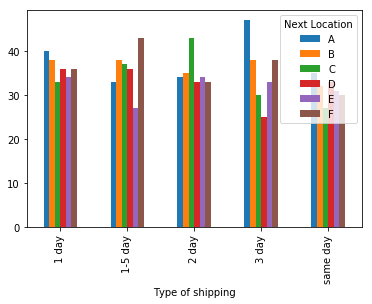

In [17]:
#visualization of date vs. locataion
pd.crosstab(df1['Type of shipping'], df1['Next Location']).plot(kind='bar');

## Categorical Feature Encoding

In [27]:
df1 = df

In [28]:
df1.head()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Type of shipping,Holiday or Working Day,Next Location,Dimensional Weight (LBS),Weight (LBS),IsWorkingDay
0,6/1/2018,M2401801474,8,99,25.0,14.8,8.4,19.1,3 day,W,F,18.722892,19.100,1
1,6/1/2018,1ZW698830442440749,8,99,16.6,13.4,13.4,6.7,3 day,W,B,17.956000,17.956,1
2,6/1/2018,1Z0064A26665793740,8,99,22.8,15.4,8.4,21.9,1-5 day,W,A,17.767518,21.900,1
3,6/1/2018,1Z02935A0400084148,8,99,17.8,7.2,6.0,5.6,2 day,W,E,4.632289,5.600,1
4,6/1/2018,1Z4R591VDA17050488,8,99,16.2,15.2,12.4,25.3,same day,W,C,18.393831,25.300,1


In [29]:
#Holiday or working day
df1['IsWorkingDay'] = np.where(df1['Holiday or Working Day'] == 'W', 1, 0)

In [30]:
df1 = pd.get_dummies(df1, columns=['Type of shipping'])

In [31]:
df1.head()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Holiday or Working Day,Next Location,Dimensional Weight (LBS),Weight (LBS),IsWorkingDay,Type of shipping_1 day,Type of shipping_1-5 day,Type of shipping_2 day,Type of shipping_3 day,Type of shipping_same day
0,6/1/2018,M2401801474,8,99,25.0,14.8,8.4,19.1,W,F,18.722892,19.100,1,0,0,0,1,0
1,6/1/2018,1ZW698830442440749,8,99,16.6,13.4,13.4,6.7,W,B,17.956000,17.956,1,0,0,0,1,0
2,6/1/2018,1Z0064A26665793740,8,99,22.8,15.4,8.4,21.9,W,A,17.767518,21.900,1,0,1,0,0,0
3,6/1/2018,1Z02935A0400084148,8,99,17.8,7.2,6.0,5.6,W,E,4.632289,5.600,1,0,0,1,0,0
4,6/1/2018,1Z4R591VDA17050488,8,99,16.2,15.2,12.4,25.3,W,C,18.393831,25.300,1,0,0,0,0,1


In [32]:
df1 = pd.get_dummies(df1, columns=['Next Location'])

In [33]:
df1.head()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Holiday or Working Day,Dimensional Weight (LBS),...,Type of shipping_1-5 day,Type of shipping_2 day,Type of shipping_3 day,Type of shipping_same day,Next Location_A,Next Location_B,Next Location_C,Next Location_D,Next Location_E,Next Location_F
0,6/1/2018,M2401801474,8,99,25.0,14.8,8.4,19.1,W,18.722892,...,0,0,1,0,0,0,0,0,0,1
1,6/1/2018,1ZW698830442440749,8,99,16.6,13.4,13.4,6.7,W,17.956000,...,0,0,1,0,0,1,0,0,0,0
2,6/1/2018,1Z0064A26665793740,8,99,22.8,15.4,8.4,21.9,W,17.767518,...,1,0,0,0,1,0,0,0,0,0
3,6/1/2018,1Z02935A0400084148,8,99,17.8,7.2,6.0,5.6,W,4.632289,...,0,1,0,0,0,0,0,0,1,0
4,6/1/2018,1Z4R591VDA17050488,8,99,16.2,15.2,12.4,25.3,W,18.393831,...,0,0,0,1,0,0,1,0,0,0


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38879 entries, 0 to 38878
Data columns (total 23 columns):
SN_EVT_DT                    38879 non-null object
PKG_SN_TCK_NR                38879 non-null object
REG_NR                       38879 non-null int64
DIS_NR                       38879 non-null int64
PKG_SN_DMN_LEN_QY (IN)       38879 non-null float64
PKG_SN_DMN_WID_QY (IN)       38879 non-null float64
PKG_SN_DMN_HT_QY (IN)        38879 non-null float64
PKG_SN_ACT_WGT_QY (LBS)      38879 non-null float64
Holiday or Working Day       38879 non-null object
Dimensional Weight (LBS)     38879 non-null float64
Weight (LBS)                 38879 non-null float64
IsWorkingDay                 38879 non-null int32
Type of shipping_1 day       38879 non-null uint8
Type of shipping_1-5 day     38879 non-null uint8
Type of shipping_2 day       38879 non-null uint8
Type of shipping_3 day       38879 non-null uint8
Type of shipping_same day    38879 non-null uint8
Next Location_A           

In [38]:
data = df1[['SN_EVT_DT', 'Weight (LBS)', 'IsWorkingDay', 'Type of shipping_1 day', 'Type of shipping_1-5 day', 'Type of shipping_2 day', 'Type of shipping_3 day', 'Type of shipping_same day', 'Next Location_A','Next Location_B', 'Next Location_C', 'Next Location_D', 'Next Location_E', 'Next Location_F']]

In [39]:
import time
import datetime
def Timestamp(s):
    t = datetime.datetime.strptime(s, "%m/%d/%Y").timestamp()
    return t

In [40]:
data['SN_EVT_DT'] = data.SN_EVT_DT.map(lambda y: Timestamp(y))

C:\Users\annro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
data

,SN_EVT_DT,Weight (LBS),IsWorkingDay,Type of shipping_1 day,Type of shipping_1-5 day,Type of shipping_2 day,Type of shipping_3 day,Type of shipping_same day,Next Location_A,Next Location_B,Next Location_C,Next Location_D,Next Location_E,Next Location_F
0,1.527826e+09,19.100000,1,0,0,0,1,0,0,0,0,0,0,1
1,1.527826e+09,17.956000,1,0,0,0,1,0,0,1,0,0,0,0
2,1.527826e+09,21.900000,1,0,1,0,0,0,1,0,0,0,0,0
3,1.527826e+09,5.600000,1,0,0,1,0,0,0,0,0,0,1,0
4,1.527826e+09,25.300000,1,0,0,0,0,1,0,0,1,0,0,0
5,1.527826e+09,3.001012,1,1,0,0,0,0,1,0,0,0,0,0
6,1.527826e+09,29.470843,1,0,0,0,1,0,0,0,1,0,0,0
7,1.527826e+09,55.599036,1,0,0,1,0,0,0,0,0,0,0,1
8,1.527826e+09,52.971084,1,0,1,0,0,0,0,0,0,1,0,0
9,1.527826e+09,16.200000,1,0,0,0,1,0,0,0,0,0,0,1


## finding the space needed for each pacakage

### Feeder Truck specifications: 
##### Actual Max. Weight : 80,000 lbs

##### Assumed Max. Weight: 2000 lbs (due to limited data)

In [42]:
TruckWeight = 2000
Space = []
for i, date in enumerate(df1['SN_EVT_DT']):
    s = df1['Weight (LBS)'][i]/2000
    Space.append(s)

In [43]:
df1['Space per Package'] = Space

In [44]:
df1.head()

,SN_EVT_DT,PKG_SN_TCK_NR,REG_NR,DIS_NR,PKG_SN_DMN_LEN_QY (IN),PKG_SN_DMN_WID_QY (IN),PKG_SN_DMN_HT_QY (IN),PKG_SN_ACT_WGT_QY (LBS),Holiday or Working Day,Dimensional Weight (LBS),...,Type of shipping_2 day,Type of shipping_3 day,Type of shipping_same day,Next Location_A,Next Location_B,Next Location_C,Next Location_D,Next Location_E,Next Location_F,Space per Package
0,6/1/2018,M2401801474,8,99,25.0,14.8,8.4,19.1,W,18.722892,...,0,1,0,0,0,0,0,0,1,0.009550
1,6/1/2018,1ZW698830442440749,8,99,16.6,13.4,13.4,6.7,W,17.956000,...,0,1,0,0,1,0,0,0,0,0.008978
2,6/1/2018,1Z0064A26665793740,8,99,22.8,15.4,8.4,21.9,W,17.767518,...,0,0,0,1,0,0,0,0,0,0.010950
3,6/1/2018,1Z02935A0400084148,8,99,17.8,7.2,6.0,5.6,W,4.632289,...,1,0,0,0,0,0,0,1,0,0.002800
4,6/1/2018,1Z4R591VDA17050488,8,99,16.2,15.2,12.4,25.3,W,18.393831,...,0,0,1,0,0,1,0,0,0,0.012650


In [56]:
data = df1[['SN_EVT_DT', 'Weight (LBS)', 'IsWorkingDay', 'Type of shipping_1 day', 'Type of shipping_1-5 day', 'Type of shipping_2 day', 'Type of shipping_3 day', 'Type of shipping_same day', 'Next Location_A','Next Location_B', 'Next Location_C', 'Next Location_D', 'Next Location_E', 'Next Location_F', 'Space per Package' ]]

In [66]:
data['SN_EVT_DT'] = data.SN_EVT_DT.map(lambda y: Timestamp(y))

C:\Users\annro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
data.head()

,SN_EVT_DT,Weight (LBS),IsWorkingDay,Type of shipping_1 day,Type of shipping_1-5 day,Type of shipping_2 day,Type of shipping_3 day,Type of shipping_same day,Next Location_A,Next Location_B,Next Location_C,Next Location_D,Next Location_E,Next Location_F,Space per Package
0,1.527826e+09,19.100,1,0,0,0,1,0,0,0,0,0,0,1,0.009550
1,1.527826e+09,17.956,1,0,0,0,1,0,0,1,0,0,0,0,0.008978
2,1.527826e+09,21.900,1,0,1,0,0,0,1,0,0,0,0,0,0.010950
3,1.527826e+09,5.600,1,0,0,1,0,0,0,0,0,0,1,0,0.002800
4,1.527826e+09,25.300,1,0,0,0,0,1,0,0,1,0,0,0,0.012650


## Building the model

#### data preperation

In [68]:
X = data.iloc[:, :].values
y = data['Space per Package'].ravel()

In [69]:
print(X.shape, y.shape)

(38879, 15) (38879,)


In [70]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [71]:
x_train

array([[  1.52964000e+09,   9.48154217e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   4.74077108e-03],
       [  1.52843040e+09,   3.69889157e+01,   1.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   1.84944578e-02],
       [  1.52817120e+09,   1.48857831e+01,   1.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   7.44289157e-03],
       ..., 
       [  1.52989920e+09,   4.58692048e+01,   1.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   2.29346024e-02],
       [  1.52938080e+09,   2.90853012e+00,   1.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   1.45426506e-03],
       [  1.52799840e+09,   1.53291566e+01,   1.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   7.66457831e-03]])

In [72]:
print(x_train.shape, y_train.shape)

(31103, 15) (31103,)


In [73]:
print(x_test.shape, y_test.shape)

(7776, 15) (7776,)


In [74]:
print('Mean space per Package in train: {0:.3f}'.format(np.mean(y_train)))
print('Mean space per package in test: {0: .3f}'.format(np.mean(y_test)))

Mean space per Package in train: 0.010
Mean space per package in test:  0.010


In [75]:
#Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
y_pred = regressor.predict(x_test)

In [77]:
y_pred

array([ 0.00713301,  0.00859817,  0.00448694, ...,  0.00515277,
        0.00287427,  0.00745   ])

In [78]:
from sklearn.dummy import DummyClassifier

In [121]:
#create model
model_dummy = DummyClassifier(strategy='most_frequent', random_state = 0)

In [123]:
#train model
model_dummy.fit(x_train, y_train)

ValueError: could not convert string to float: '6/3/2018'